In [1]:
# 导入类库
import pandas as pd
import numpy as np
import matplotlib as mpl
from numpy import arange
import matplotlib.pyplot as plt
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 导入数据
filename = 'housing.csv'
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PRTATIO','B','LSTAT','MEDV']
dataset = pd.read_csv(filename,names= names, delim_whitespace=True)

In [3]:
# 数据维度
print(dataset.shape)

(506, 14)


In [4]:
# 特征属性的字段类型
print(dataset.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PRTATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [5]:
# 描述统计信息
pd.set_option('precision',1)
print(dataset.describe())

          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5   
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7   
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0   
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0   
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0   
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0   
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0   

         TAX  PRTATIO      B  LSTAT   MEDV  
count  506.0    506.0  506.0  506.0  506.0  
mean   408.2     18.5  356.7   12.7   22.5  
std    168.5      2.2   91.3    7.1    9.2  
min    187.0     12.6    0.3    1.7    5.0  
25%    279.0     17.4  375.4    6.9   17.0  
50%    330.0     19.1  391.4   11.4   21.2  


In [6]:
# 关联关系
pd.set_option('precision',2)
print(dataset.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
PRTATIO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.39  0.18  -0.36  4.88e-02 -0.

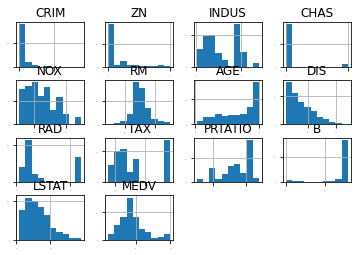

In [7]:
# 直方图
dataset.hist(sharex=False,sharey=False,xlabelsize=1,ylabelsize=1)
plt.show()

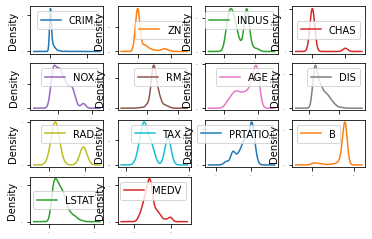

In [8]:
# 密度图
dataset.plot(kind = 'density', subplots = True, layout = (4,4),sharex = False, fontsize =1)
plt.show()

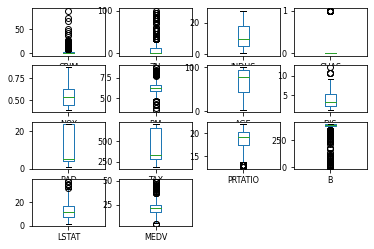

In [9]:
# 箱线图
dataset.plot(kind ='box', subplots = True, layout = (4,4),sharex = False, sharey = False,fontsize = 8)
plt.show()

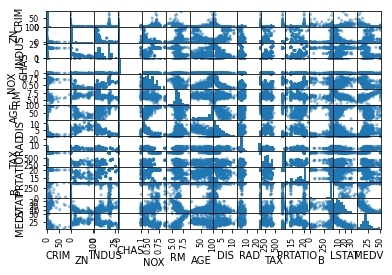

In [10]:
# 散点矩阵图
scatter_matrix(dataset)
plt.show()

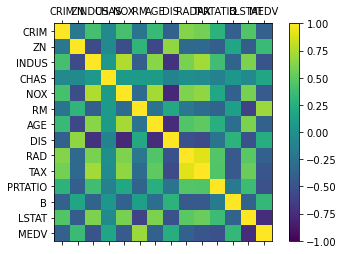

In [11]:
# 相关矩阵图
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(),vmin = -1, vmax = 1, interpolation = 'none')
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [12]:
# 分离数据集
array = dataset.values
X = array[:, 0:13]
Y = array[:, 13]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state= seed)

In [13]:
# 评估算法 —— 评估标准
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [14]:
# 评估算法 —— baseline
models = {}
models['LR'] = LinearRegression()
models['LASSO'] = Lasso()
models['EN'] = ElasticNet()
models['KNN'] = KNeighborsRegressor()
models['CART'] =DecisionTreeRegressor()
models['SVM'] = SVR()

In [15]:
# 评估算法
results = []
for key in models:
    kfold = KFold(n_splits=num_folds,random_state=seed)
    cv_result = cross_val_score(models[key],X_train,Y_train,cv = kfold,scoring=scoring)
    results.append(cv_result)
    print('%s: %f(%f)'%(key,cv_result.mean(),cv_result.std()))

LR: -21.379856(9.414264)
LASSO: -26.423561(11.651110)
EN: -27.502259(12.305022)
KNN: -41.896488(13.901688)
CART: -25.947784(12.703007)
SVM: -67.827886(29.049138)


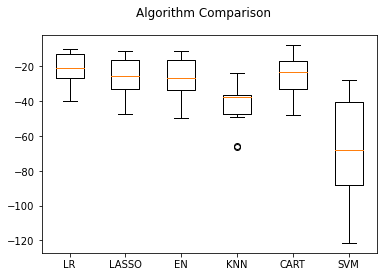

In [16]:
# 评估算法 —— 箱线图
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

In [17]:
# 评估算法 —— 正太化数据
pipelines = {}
pipelines['ScalerLR'] = Pipeline([('Scaler',StandardScaler()),('LR',LinearRegression())])
pipelines['ScalerLASSO'] = Pipeline([('Scaler',StandardScaler()),('LASSO',Lasso())])
pipelines['SclaerEn'] = Pipeline([('Scaler',StandardScaler()),('EN',ElasticNet())])
pipelines['ScalerKNN'] = Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsRegressor())])
pipelines['ScalerCART'] = Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeRegressor())])
pipelines['ScalerSVM'] = Pipeline([('Scaler',StandardScaler()),('SVM',SVR())])
results = []
for key in models:
    kfold = KFold(n_splits=num_folds,random_state=seed)
    cv_result = cross_val_score(models[key],X_train,Y_train,cv = kfold,scoring=scoring)
    results.append(cv_result)
    print('%s: %f(%f)'%(key,cv_result.mean(),cv_result.std()))

LR: -21.379856(9.414264)
LASSO: -26.423561(11.651110)
EN: -27.502259(12.305022)
KNN: -41.896488(13.901688)
CART: -25.647641(13.692306)
SVM: -67.827886(29.049138)


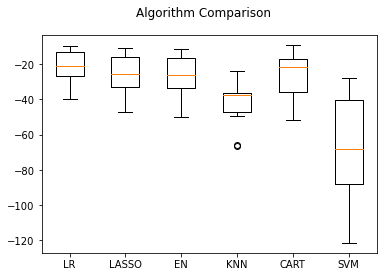

In [18]:
# 评估算法 —— 箱线图
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

In [19]:
# 调参改善算法 —— KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_neighbors':[1,3,5,7,9,11,13,15,17,19,21]}
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds,random_state=seed)
grid = GridSearchCV(estimator=model, param_grid = param_grid, scoring=scoring,cv=kfold)
grid_result = grid.fit(X = rescaledX, y=Y_train)
print('最优：%s 使用%s'%(grid_result.best_score_,grid_result.best_params_))
cv_results = zip(grid_result.cv_results_['mean_test_score'],
                grid_result.cv_results_['std_test_score'],
                grid_result.cv_results_['params'])
for mean, std, param in cv_results :
    print('%f(%f) with %r'%(mean,std,param))

最优：-18.10930386178861 使用{'n_neighbors': 3}
-20.169640(14.986904) with {'n_neighbors': 1}
-18.109304(12.880861) with {'n_neighbors': 3}
-20.063115(12.138331) with {'n_neighbors': 5}
-20.514297(12.278136) with {'n_neighbors': 7}
-20.319536(11.554509) with {'n_neighbors': 9}
-20.963145(11.540907) with {'n_neighbors': 11}
-21.099040(11.870962) with {'n_neighbors': 13}
-21.506843(11.468311) with {'n_neighbors': 15}
-22.739137(11.499596) with {'n_neighbors': 17}
-23.829011(11.277558) with {'n_neighbors': 19}
-24.320892(11.849667) with {'n_neighbors': 21}


In [20]:
# 集成算法
ensembles = {}
ensembles['ScaledAB'] = Pipeline([('Scaler',StandardScaler()),('AB',AdaBoostRegressor())])
ensembles['ScaledAB-KNN'] = Pipeline([('Scaler',StandardScaler()),('ABKNN',AdaBoostRegressor(base_estimator=KNeighborsRegressor(n_neighbors=3)))])
ensembles['ScaledAB-LR'] = Pipeline([('Scaler',StandardScaler()),('ABLR',AdaBoostRegressor(LinearRegression()))])
ensembles['ScaledRFR'] = Pipeline([('Scaler',StandardScaler()),('RFR',RandomForestRegressor())])
ensembles['ScaledETR'] = Pipeline([('Scaler',StandardScaler()),('ETR',ExtraTreesRegressor())])
ensembles['ScaledGBR'] = Pipeline([('Scaler',StandardScaler()),('GBR',GradientBoostingRegressor())])

results = []
for key in ensembles:
    kfold = KFold(n_splits=num_folds,random_state=seed)
    cv_result = cross_val_score(ensembles[key],X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_result)
    print('%s: %f(%f)'%(key,cv_result.mean(),cv_result.std()))

ScaledAB: -14.605052(6.455070)
ScaledAB-KNN: -15.518512(9.689451)
ScaledAB-LR: -24.416240(9.079068)
ScaledRFR: -11.926645(6.242848)
ScaledETR: -9.429135(5.942827)
ScaledGBR: -10.057371(4.490587)


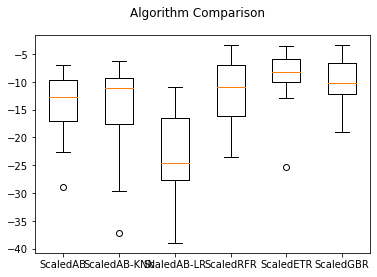

In [21]:
# 集成算法 —— 箱线图
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(ensembles.keys())
plt.show()

In [22]:
# 集成算法GBM —— 调参
caler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_estimators':[10,50,100,200,300,400,500,600,700,800,900]}
model = GradientBoostingRegressor()
kfold = GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv= kfold)
grid_result = grid.fit(X = rescaledX, y = Y_train)
print('最优：%s 使用%s'%(grid_result.best_score_,grid_result.best_params_))

# 集成算法ET —— 调参
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_estimators':[5,10,20,30,40,50,60,70,80,90,100]}
model = ExtraTreesRegressor()
kfold = KFold(n_splits=num_folds,random_state=seed)
grid = GridSearchCV(estimator=model,param_grid = param_grid,scoring=scoring,cv=kfold)
grid_result = grid.fit(X = rescaledX,y =Y_train)
print('最优：%s 使用%s'%(grid_result.best_score_,grid_result.best_params_))

最优：-18.10930386178861 使用{'n_neighbors': 3}
最优：-9.06331904487805 使用{'n_estimators': 50}


In [23]:
# 训练模型
caler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
gbr = ExtraTreesRegressor(n_estimators=80)
gbr.fit(X = rescaledX,y = Y_train)

ExtraTreesRegressor(n_estimators=80)

In [24]:
# 评估算法模型
rescaledX_validation = scaler.transform(X_validation)
predictions = gbr.predict(rescaledX_validation)
print(mean_squared_error( Y_validation,predictions))

14.222926501225487
